# Homework 2

1. Given a set of temperature and susceptibility values, determine the Curie law (i.e. Curie constant and Curie-Weiss factor):

    $\chi(T)$ = $\chi_0$ + $\frac{C}{T-\Theta}$

    where C is the Curie constant, and $\Theta$ is the Curie-Weiss factor.

2. Calculate the $p_{eff}$
3. Calculate the molar Larmor susceptibility.

In [1]:
using CSV
using LsqFit
using Plots

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `DataFrame!(CSV.File(input; kw...))`
└ @ CSV /Users/yanxon/.julia/packages/CSV/OM6FO/src/CSV.jl:40


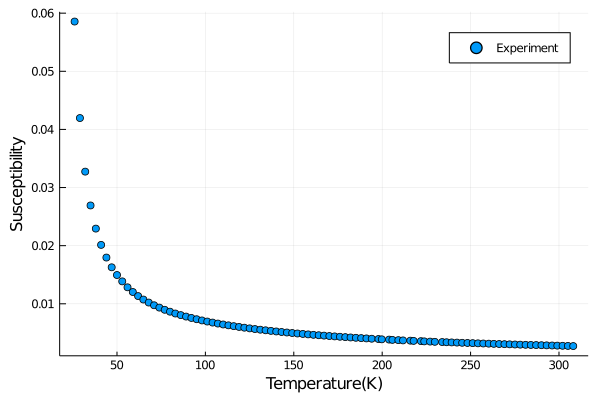

In [2]:
data = last(CSV.read("data.csv"), 95);
data = convert(Matrix{Float64}, data);
s = size(data)
scatter(data[:,1], data[:,2], label="Experiment", xlabel="Temperature(K)", ylabel="Susceptibility")

In [3]:
# Create the Curie's Law: X = X_0 + C / (T - T_0), where
# X is the susceptibility and T is the temperature.
# C is the Curie constant and T_0 is the Curie-Weiss factor
@. model(x, p) = p[1] + p[2] / (x - p[3])

model (generic function with 1 method)

**Given the data appears in the figure above, we have to fit the model, i.e. Curie's Law. However, we will initialize arbitrary parameters to the model since we don't know the exact value.** The initial parameters are 1., 0.1, 1. for the $\chi_0$, C, and $\Theta$, respectively.

In [4]:
p0 = [1., 0.1, 11] # Initial parameters
fit = curve_fit(model, data[:,1], data[:,2], p0, autodiff=:finiteforward);

0.9638485042786875 14167.341264657849 14978.779525193431


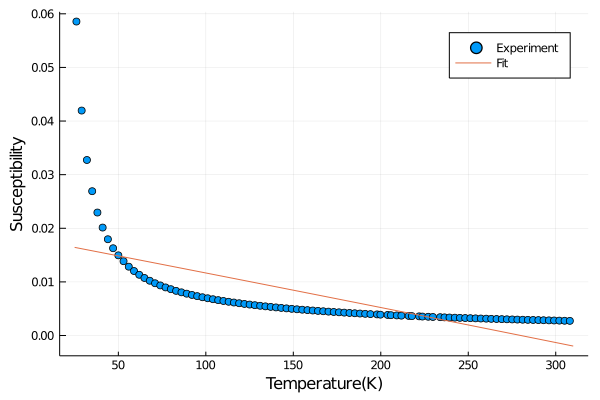

In [5]:
X0, C, T0 = fit.param # Fitted parameters
println(X0, " ", C, " ",T0)
X(T) = X0 + C / (T - T0)
scatter(data[:,1], data[:,2], xlabel="Temperature(K)", ylabel="Susceptibility", label="Experiment")
plot!(25:0.1:310, X, label="Fit")

As you can see, the curve fitting method yields very poor results. This is due to the fact that initial parameters are not well provided. Hence, the optimization of the parameters fall into a local minima, which it correspondingly yields poor fitting. In the susceptibility equation, the $\chi_0$ determines the y-asymptote, and the $\Theta$ determines x-asymptote. Here we can define bounds to these two parameters: (0, 0.005) and (0, 25), respectively. Next, the bound for C is not very obvious to be determined. 

A remedy to this problem is to rewrite the Curie's law to a Linear equation:
$\frac{1}{\chi(T)-\chi_0}$ = $\frac{1}{C} (T-\Theta)$.

As you see in the first equation, we can approximate $\chi_0$ = 0 for small T. Let's take T < 50 fit for the linear equation.

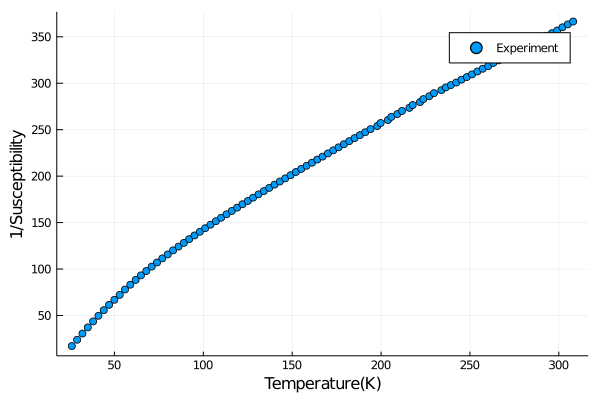

In [6]:
y_inv = 1 ./ data[:,2];
scatter(data[:,1], y_inv, label="Experiment", xlabel="Temperature(K)", ylabel="1/Susceptibility")

In [7]:
@. model2(x, p) = 1/p[1] * (x - p[2])
p2 = [1., 1.] # Initial parameters
fit2 = curve_fit(model2, data[1:10,1], y_inv[1:10], p2, autodiff=:finiteforward);
Cinv_2, T0_2 = fit2.param
C_2, T0_2 = 1/Cinv_2, T0_2

(2.0516424700800306, 17.18800821265757)

Now we have an approximate p0 for the initial model as follow:
- C = 2.0516
- T0 = 17.2
- $\chi_0$ = 0.005

0.0015715715205812488 0.42195182616772714 18.595474854913604


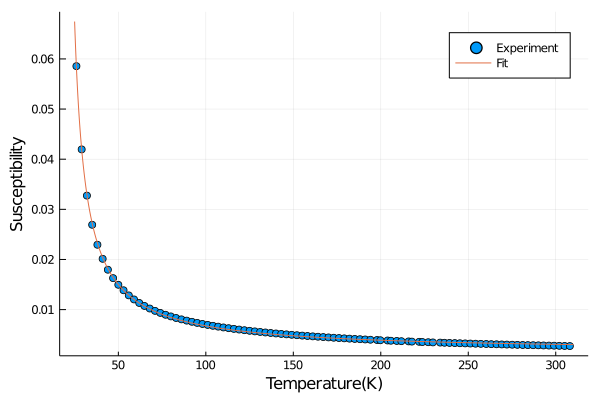

In [17]:
@. model(x, p) = p[1] + p[2] / (x - p[3])
p0 = [0.005, 2.05, 17.2] # Initial parameters 
fit = curve_fit(model, data[:,1], data[:,2], p0, autodiff=:finiteforward);
X0, C, T0 = fit.param # Fitted parameters
println(X0, " ", C, " ",T0)
X(T) = X0 + C / (T - T0)
scatter(data[:,1], data[:,2], xlabel="Temperature(K)", ylabel="Susceptibility", label="Experiment")
plot!(25:0.1:310, X, label="Fit")
savefig("Curies_Law.png")
plot!()

Finally, we obtain:
- C = 0.4220 emu$\cdot$K/mol
- $\Theta$ = 18.60 K
- $\chi_0$ = 1.5716E-3

## Calculate the $p_{eff}$

$p = \sqrt{\frac{3*C*k_B}{N_A * \mu^2}}$

In [19]:
p = sqrt(3*C*0.8617e-4/0.6022e24/(0.579e-8)^2)

2.324455144468439e-6

## Calculate the Larmor Susceptibility
$\chi^{molar} = -0.79Z_i * 10^{-6} <(r/a_0)^2> cm^3/mole$

Assuming $<(r/a_0)^2>$ is a unity.

In [21]:
chi = -0.79*(58+46+51)*10^-6

-0.00012245000000000005

In [22]:
println("The Larmor susceptibility is -12E-5")

The Larmor susceptibility is -12E-5
